# ■セクション1

## 1.1 Tensorflowのインストール

In [1]:
pip install tensorflow

## 1.2各種インポート

In [2]:
from tensorflow.keras import datasets, layers, models
import tensorflow as tf

## 1.3 CIFAR-10をダウンロード

In [3]:
# CIFAR-10 データセットをダウンロードします。
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


## 1.4 画像を何枚か表示

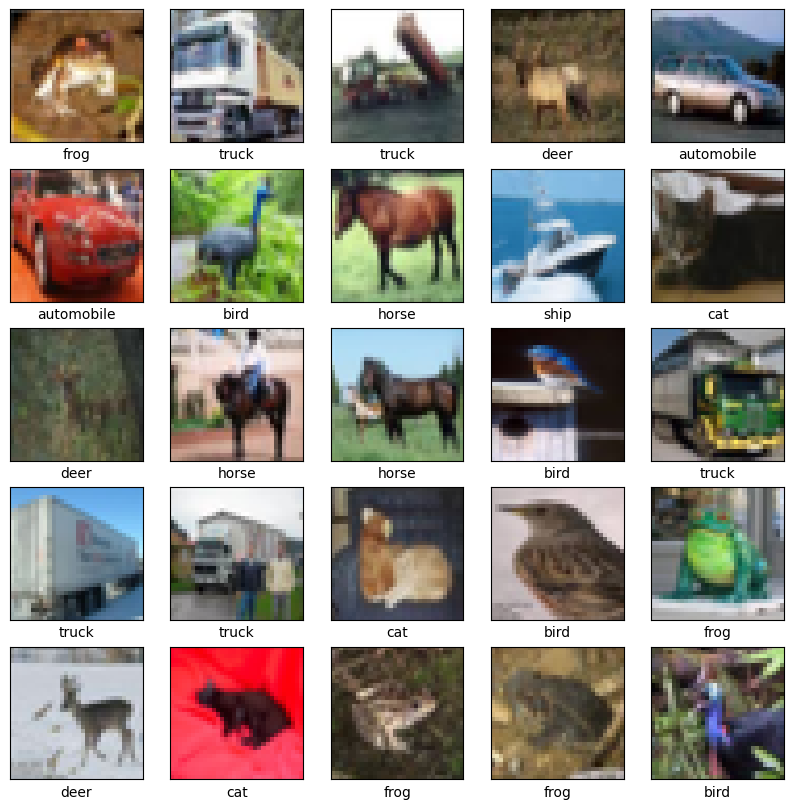

In [4]:
import matplotlib.pyplot as plt
from tensorflow.keras import datasets

# CIFAR-10データセットのカテゴリ名リスト
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

# 画像とそのラベルを表示する関数
def show_images(images, labels):
    # 画像を表示する領域を10x10のサイズで作ります
    plt.figure(figsize=(10, 10))

    # 25枚の画像を表示するため、5x5のグリッドを作ります
    for i in range(25):
        # 5x5のグリッドの中で、i番目の位置に次の画像を配置します
        plt.subplot(5, 5, i+1)

        # x軸とy軸の目盛りを非表示にします
        plt.xticks([])
        plt.yticks([])

        # グリッドの線を非表示にします
        plt.grid(False)

        # images[i]（i番目の画像）を表示します
        plt.imshow(images[i], cmap=plt.cm.binary)

        # 画像の下にラベルを表示します。labels[i][0]はラベルのインデックスなので、
        # class_namesリストから対応する名前を取得します
        plt.xlabel(class_names[labels[i][0]])

    # すべての画像をまとめて表示します
    plt.show()

    # train_imagesとtrain_labelsを使用して画像とラベルを表示します。
show_images(train_images, train_labels)

## 1.5 データの前処理

In [5]:
# 画像のピクセルの値を0から1の範囲に変換します（正規化）。
# 通常、画像のピクセルは0から255の値を持っていますが、
# これを255で割ることで、値が0から1になり、計算が簡単になります。
train_images, test_images = train_images/ 255.0, test_images / 255.0

## 1.6 モデルの作成

In [6]:
# CNN（畳み込みニューラルネットワーク）モデルを作成します。これは、画像を理解するための強力なツールです。
model = models.Sequential()

# 最初の層：32個のフィルターを持つ畳み込み層を追加します。これは、画像の特徴（例：エッジ、テクスチャ）を検出します。
# 3x3のサイズのフィルターを使用し、活性化関数としてReLU（ランプ関数）を使用します。
# input_shape=(32, 32, 3)は、入力画像が32x32ピクセルで3つのカラーチャンネル（RGB）を持っていることを意味します。
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# 次の層：2x2のサイズで最大プーリング層を追加します。これは、画像のサイズを半分にし、重要な特徴だけを残します。
model.add(layers.MaxPooling2D((2, 2)))

# 畳み込み層をもう一度追加しますが、今回は64個のフィルターを使用します。
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# もう一度、最大プーリング層を追加します。
model.add(layers.MaxPooling2D((2, 2)))

# 64個のフィルターを持つもう一つの畳み込み層を追加します。
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# ここで、画像を1Dのリストに変換します。これは、全結合層（デンスレイヤー）に入力するための前処理です。
model.add(layers.Flatten())

# 64個のノードを持つ全結合層（デンスレイヤー）を追加し、ReLU活性化関数を使用します。
model.add(layers.Dense(64, activation='relu'))

# 出力層：10個のノードを持つ全結合層を追加します。これは、CIFAR-10データセットの10のカテゴリに対応します。
model.add(layers.Dense(10, activation='softmax'))

## 1.7 モデルのコンパイル

In [7]:
model.compile(
    # optimizerは、モデルが学習する際に、どのように重みを更新するかを決定します。'adam'は一般的な選択で、効率的に学習します。
    optimizer='adam',

    # lossは、モデルの予測が実際のラベルとどれだけ離れているかを測定します。これを最小化することが目標です。
    # SparseCategoricalCrossentropyは分類問題によく使われ、from_logits=Trueはモデルの出力が生の数値（ロジット）であることを意味します。
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),

    # metricsは、トレーニングやテストの際にモデルの性能を評価するための指標です。ここでは'accuracy'を使用して、正確に分類された割合を見ます。
    metrics=['accuracy']
)

## 1.8 モデルの訓練

In [8]:
# ここでモデルをトレーニング（学習）します。
history = model.fit(
    # train_imagesとtrain_labelsは、モデルが学ぶための画像とその正解ラベルです。
    train_images, train_labels,
    # epochsは、モデルがトレーニングデータ全体を何回見るかを決めます。10ということは、全部で10回見ます。
    epochs=10,
    # validation_dataは、モデルが学んでいる間に、どれくらいうまくやっているかをチェックするためのテストデータです。
    # この場合、test_imagesとtest_labelsを使って、学習の進行状況を確認します。
    validation_data=(test_images, test_labels)
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 20s 6ms/step - loss: 1.5286 - accuracy: 0.4408 - val_loss: 1.3232 - val_accuracy: 0.5323
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1601 - accuracy: 0.5878 - val_loss: 1.1048 - val_accuracy: 0.6061
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0200 - accuracy: 0.6410 - val_loss: 1.0695 - val_accuracy: 0.6228
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9334 - accuracy: 0.6725 - val_loss: 0.9663 - val_accuracy: 0.6583
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8607 - accuracy: 0.6984 - val_loss: 1.0341 - val_accuracy: 0.6463
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8093 - accuracy: 0.7173 - val_loss: 0.9109 - val_accuracy: 0.6849
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7579 - accuracy: 0.7359 - val_loss: 0.9209 - val_accuracy: 0.6817
E

## 1.9 モデルの評価

In [9]:
# ここでモデルの性能をテストデータを使って評価します。
test_loss, test_acc = model.evaluate(
    # test_imagesとtest_labelsは、モデルがまだ見ていない新しいデータとその正解ラベルです。
    test_images,test_labels,
    # verboseは、評価の進行状況をどれくらい詳しく表示するかを決めます。2は、少しだけ情報を表示します。
    verbose=2
)

# テストの正確さ（accuracy）を表示します。これはモデルがどれくらいうまく新しいデータを分類できるかを示します。
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.8886 - accuracy: 0.6996 - 696ms/epoch - 2ms/step

Test accuracy: 0.6995999813079834


## 1.10 カスタム画像データのテスト

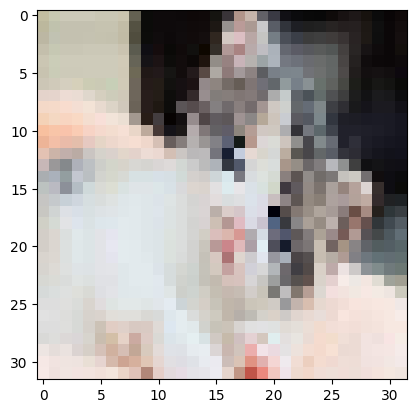

1/1 [==============================] - 0s 28ms/step
airplane = 4%
automobile = 0%
bird = 0%
cat = 69%
deer = 6%
dog = 16%
frog = 0%
horse = 2%
ship = 0%
truck = 0%
この画像は、おそらく: cat


In [17]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# カスタムの画像を読み込みます（この画像はあなたがテストしたいものです）。
img_path = './cat.jpg'  # ここに使いたい画像ファイルのパスを入力してください。
img = image.load_img(img_path, target_size=(32, 32))

# 画像を画面上に表示します。
plt.imshow(img)
plt.show()

# 画像を数値のリスト（配列）に変換します。これでコンピュータは画像を理解できる形式になります。
x = image.img_to_array(img)

# モデルが扱える形にするために、配列を4次元テンソルに変換します（一番外側に1つ余分な次元を追加します）。
x = np.expand_dims(x, axis=0)

# 画像の配列の数値を0から1の間に調整します。これはモデルが上手く理解できるようにするための前処理です。
x /= 255.0

# 用意したモデルを使って、画像が何かを予測します（例えば犬や猫など）。
predictions = model.predict(x)

# 予測結果を表示します。各カテゴリ（例：犬、猫など）で、その画像である可能性のパーセンテージを表示します。
for i, acc in enumerate(predictions[0]):
    print(f"{class_names[i]} = {int(acc * 100)}%")

# 最も可能性が高いカテゴリを最終的な予測結果として表示します。
predicted_class = np.argmax(predictions[0])
print('この画像は、おそらく:', class_names[predicted_class])

# ■セクション2モデルの精度をあげよう

## 2.1 改良モデルの作成

In [18]:
from tensorflow.keras import models, layers

# 新しい改良されたCNN（畳み込みニューラルネットワーク）モデルを作成します。
model_v2 = models.Sequential()

# 画像の特徴を抽出するための層を追加します。ここでは、32個のフィルターを使用します。
model_v2.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
# データを正規化して、学習を効率的にします。
model_v2.add(layers.BatchNormalization())

# 同様にもう一つの畳み込み層を追加します。
model_v2.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
# もう一度正規化します。
model_v2.add(layers.BatchNormalization())

# 画像のサイズを半分にする層を追加します。
model_v2.add(layers.MaxPooling2D((2, 2)))
# ニューロンの一部をランダムに無視して過学習を防ぐ層を追加します。ここでは20%無視します。
model_v2.add(layers.Dropout(0.2))

# 64個のフィルターを使って、さらに特徴を抽出します。
model_v2.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model_v2.add(layers.BatchNormalization())
model_v2.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model_v2.add(layers.BatchNormalization())
model_v2.add(layers.MaxPooling2D((2, 2)))
# 今回は30%のニューロンを無視します。
model_v2.add(layers.Dropout(0.3))

# さらに128個のフィルターを使って特徴を抽出します。
model_v2.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model_v2.add(layers.BatchNormalization())
model_v2.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model_v2.add(layers.BatchNormalization())
model_v2.add(layers.MaxPooling2D((2, 2)))
# 今回は40%のニューロンを無視します。
model_v2.add(layers.Dropout(0.4))

# 2次元のデータを1次元に変換して、通常の全結合層に入力できるようにします。
model_v2.add(layers.Flatten())
# 通常の全結合層を追加して、さらに特徴を学習します。
model_v2.add(layers.Dense(128, activation='relu'))
# 最後に正規化します。
model_v2.add(layers.BatchNormalization())
# 50%のニューロンを無視します。
model_v2.add(layers.Dropout(0.5))

# 最後の出力層です。今回は10個の出力があり、それぞれのカテゴリー（例：犬、猫など）に属する確率を表します。
model_v2.add(layers.Dense(10, activation='softmax'))

## 2.2 改良モデルのコンパイル

In [19]:
# 改良したモデルを訓練する準備をします。
model_v2.compile(optimizer='adam',  # 最適化手法としてAdamを使用します。
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # 損失関数を指定します。
              metrics=['accuracy'])  # 評価基準として正解率を計測します。

## 2.3 改良モデルの訓練

In [20]:
history = model_v2.fit(
    train_images,  # 訓練画像
    train_labels,  # 訓練ラベル
    batch_size=32,  # バッチサイズ
    epochs=20,  # エポック数
    validation_data=(test_images, test_labels)  # 検証データ
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 24s 11ms/step - loss: 1.5550 - accuracy: 0.4637 - val_loss: 1.1850 - val_accuracy: 0.5700
Epoch 2/20
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0275 - accuracy: 0.6403 - val_loss: 0.8386 - val_accuracy: 0.7073
Epoch 3/20
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8668 - accuracy: 0.6992 - val_loss: 0.9094 - val_accuracy: 0.6981
Epoch 4/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7745 - accuracy: 0.7336 - val_loss: 0.6743 - val_accuracy: 0.7679
Epoch 5/20
1563/1563 [==============================] - 16s 11ms/step - loss: 0.7048 - accuracy: 0.7584 - val_loss: 0.7749 - val_accuracy: 0.7383
Epoch 6/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.6499 - accuracy: 0.7789 - val_loss: 0.6658 - val_accuracy: 0.7725
Epoch 7/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.6091 - accuracy: 0.7917 - val_loss: 0.6317 - val_accura

## 2.4 改良モデルの評価

In [21]:
test_loss, test_acc = model_v2.evaluate(
    test_images,  # テスト画像
    test_labels,  # テストラベル
    verbose=2  # 進行状況の表示レベル
)

print('\nTest accuracy:', test_acc)  # テストデータでの正解率を表示します。

313/313 - 1s - loss: 0.4328 - accuracy: 0.8608 - 1s/epoch - 3ms/step

Test accuracy: 0.86080002784729


## 2.5 カスタム画像のデータでテスト

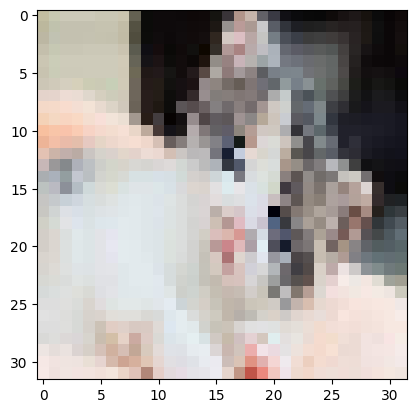

1/1 [==============================] - 0s 78ms/step
airplaneの確率は1%です。
automobileの確率は2%です。
birdの確率は2%です。
catの確率は53%です。
deerの確率は1%です。
dogの確率は33%です。
frogの確率は4%です。
horseの確率は0%です。
shipの確率は0%です。
truckの確率は0%です。
この画像は、おそらく: cat


In [23]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# あなたの画像ファイルを読み込みます。
img_path = './cat.jpg'
# 画像を32x32ピクセルにリサイズして読み込みます（モデルがこのサイズを要求するため）。
img = image.load_img(img_path, target_size=(32, 32))

# 画像を画面に表示します。
plt.imshow(img)
plt.show()

# 画像を数字のリストに変換します（コンピュータは画像を数字の集まりとして扱います）。
x = image.img_to_array(img)

# モデルが予測を行う前に、画像データを特定の形に整形します。
x = np.expand_dims(x, axis=0)

# 数字のリストを0から1の範囲に変更します（モデルがこの範囲でうまく動作するため）。
x /= 255.0

# 改良したモデルを使って、画像が何かを予測します。
predictions = model_v2.predict(x)

# それぞれのカテゴリ（例：犬、猫など）について、その確率を表示します。
for i, acc in enumerate(predictions[0]):
  print(f"{class_names[i]}の確率は{int(acc * 100)}%です。")

# 最も確率が高いカテゴリを、最終的な予測結果として表示します。
predicted_class = np.argmax(predictions[0])
print('この画像は、おそらく:', class_names[predicted_class])

# ■セクション3　課題 CIFAR-100 データセットで分類を行う

## 3.2 データセットのダウンロード

In [24]:
# CIFAR-100 データセットをダウンロードします。
(train_images, train_labels), (test_images, test_labels) = datasets.cifar100.load_data()

169001437/169001437 [==============================] - 6s 0us/step


## 3.3 画像を何枚か表示


100%|██████████| 169001437/169001437 [00:08<00:00, 20904224.68it/s]


Extracting ./data/cifar-100-python.tar.gz to ./data


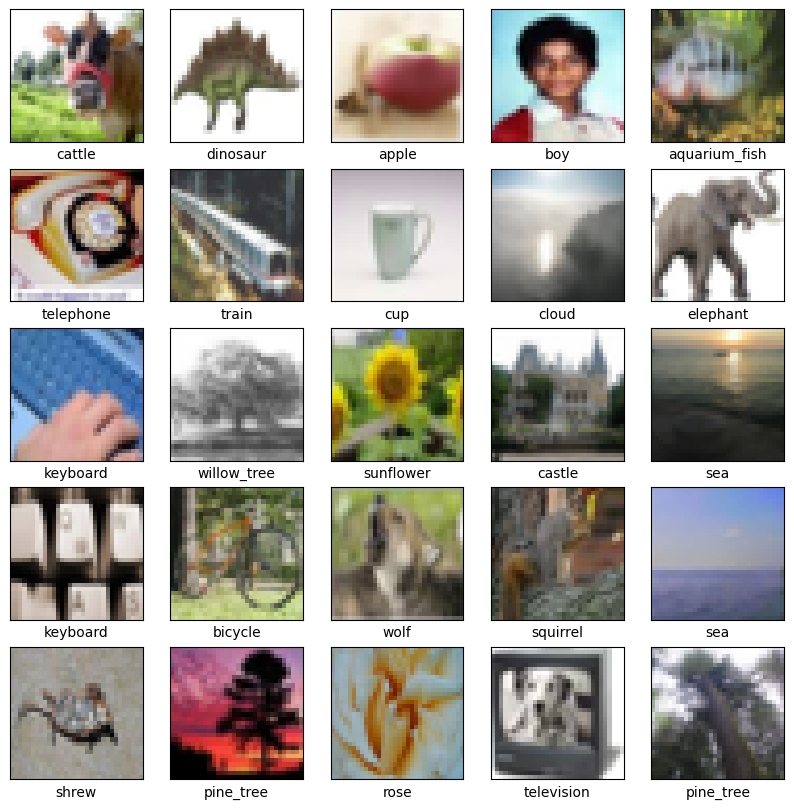

In [25]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR100

# CIFAR-100のクラス名を定義します（CIFAR-100は、100種類の異なるカテゴリの画像が含まれています）。
class_names = [
    # 以下はカテゴリ名のリストです（例：リンゴ、ベビー、くまなど）
'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel',
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]

# 画像を表示する関数を定義します。
def show_images(images, labels):
    # 画像を表示するための領域を作成します。
    plt.figure(figsize=(10, 10))
    # 25枚の画像を表示します（5x5のグリッド形式）。
    for i in range(25):
        # サブプロットを作成して画像を配置します。
        plt.subplot(5, 5, i + 1)
        # x軸とy軸の目盛りを表示しないようにします。
        plt.xticks([])
        plt.yticks([])
        # グリッド線を非表示にします。
        plt.grid(False)
        # 画像を表示します。
        plt.imshow(images[i].permute(1, 2, 0))
        # 画像の下に、画像が属するカテゴリ名を表示します。
        plt.xlabel(class_names[labels[i]])
    # 画像を画面に表示します。
    plt.show()

# CIFAR-100データセットをダウンロードします（学習用の画像データセット）。
transform = transforms.Compose([transforms.ToTensor()])
dataset = CIFAR100(root='./data', train=True, download=True, transform=transform)

# データセットから最初の25枚の画像とそのカテゴリを取得します。
images = [dataset[i][0] for i in range(25)]
labels = [dataset[i][1] for i in range(25)]

# 最初の25枚の画像を表示します。
show_images(images, labels)

## 3.4 データの前処理

In [26]:
train_images, test_images = train_images/ 255.0, test_images / 255.0


## 3.5 モデルの作成

In [27]:
from tensorflow.keras import models, layers

# 新しい改良されたCNN（畳み込みニューラルネットワーク）モデルを作成します。
model_v2 = models.Sequential()

# 画像の特徴を抽出するための層を追加します。ここでは、32個のフィルターを使用します。
model_v2.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
# データを正規化して、学習を効率的にします。
model_v2.add(layers.BatchNormalization())

# 同様にもう一つの畳み込み層を追加します。
model_v2.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
# もう一度正規化します。
model_v2.add(layers.BatchNormalization())

# 画像のサイズを半分にする層を追加します。
model_v2.add(layers.MaxPooling2D((2, 2)))
# ニューロンの一部をランダムに無視して過学習を防ぐ層を追加します。ここでは20%無視します。
model_v2.add(layers.Dropout(0.2))

# 64個のフィルターを使って、さらに特徴を抽出します。
model_v2.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model_v2.add(layers.BatchNormalization())
model_v2.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model_v2.add(layers.BatchNormalization())
model_v2.add(layers.MaxPooling2D((2, 2)))
# 今回は30%のニューロンを無視します。
model_v2.add(layers.Dropout(0.3))

# さらに128個のフィルターを使って特徴を抽出します。
model_v2.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model_v2.add(layers.BatchNormalization())
model_v2.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model_v2.add(layers.BatchNormalization())
model_v2.add(layers.MaxPooling2D((2, 2)))
# 今回は40%のニューロンを無視します。
model_v2.add(layers.Dropout(0.4))

# 2次元のデータを1次元に変換して、通常の全結合層に入力できるようにします。
model_v2.add(layers.Flatten())
# 通常の全結合層を追加して、さらに特徴を学習します。
model_v2.add(layers.Dense(128, activation='relu'))
# 最後に正規化します。
model_v2.add(layers.BatchNormalization())
# 50%のニューロンを無視します。
model_v2.add(layers.Dropout(0.5))

# 最後の出力層です。今回は10個の出力があり、それぞれのカテゴリー（例：犬、猫など）に属する確率を表します。
model_v2.add(layers.Dense(10, activation='softmax'))

## 3.6 モデルのコンパイル

In [28]:
model_v2.compile(optimizer='adam',  # 最適化手法としてAdamを使用します。
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # 損失関数を指定します。
              metrics=['accuracy'])  # 評価基準として正解率を計測します。

## 3.7 モデルの訓練

In [29]:
test_loss, test_acc = model_v2.evaluate(
    test_images,  # テスト画像
    test_labels,  # テストラベル
    verbose=2  # 進行状況の表示レベル
)

print('\nTest accuracy:', test_acc)  # テストデータでの正解率を表示します。

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


313/313 - 2s - loss: nan - accuracy: 0.0100 - 2s/epoch - 5ms/step

Test accuracy: 0.009999999776482582


## 3.8 カスタム画像のデータでテスト

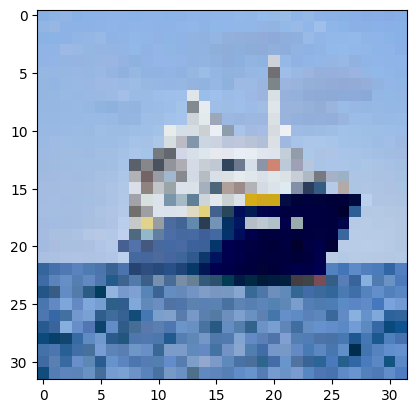

1/1 [==============================] - 0s 28ms/step
appleの確率は9%です。
aquarium_fishの確率は9%です。
babyの確率は10%です。
bearの確率は9%です。
beaverの確率は9%です。
bedの確率は9%です。
beeの確率は10%です。
beetleの確率は10%です。
bicycleの確率は10%です。
bottleの確率は10%です。
この画像は、おそらく: baby


In [33]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# あなたの画像ファイルを読み込みます。
img_path = './test123.jpg'
# 画像を32x32ピクセルにリサイズして読み込みます（モデルがこのサイズを要求するため）。
img = image.load_img(img_path, target_size=(32, 32))

# 画像を画面に表示します。
plt.imshow(img)
plt.show()

# 画像を数字のリストに変換します（コンピュータは画像を数字の集まりとして扱います）。
x = image.img_to_array(img)

# モデルが予測を行う前に、画像データを特定の形に整形します。
x = np.expand_dims(x, axis=0)

# 数字のリストを0から1の範囲に変更します（モデルがこの範囲でうまく動作するため）。
x /= 255.0

# 改良したモデルを使って、画像が何かを予測します。
predictions = model_v2.predict(x)

# それぞれのカテゴリ（例：犬、猫など）について、その確率を表示します。
for i, acc in enumerate(predictions[0]):
  print(f"{class_names[i]}の確率は{int(acc * 100)}%です。")

# 最も確率が高いカテゴリを、最終的な予測結果として表示します。
predicted_class = np.argmax(predictions[0])
print('この画像は、おそらく:', class_names[predicted_class])

## 【調べる力、試す力】精度を上げる為に出来ることを調べて、色々試してみましょう